Deep Learning for Image Classification

Image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 grayscale images. There is a training set of 60,000 images and 10,000 test images.

Label	Description
0	    T-shirt/top
1	    Trouser
2	    Pullover
3	    Dress
4	    Coat
5	    Sandal
6	    Shirt
7	    Sneaker
8	    Bag
9	    Ankle boot

The code below to download the dataset using Keras.

In [ ]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Visualizing the Data¶
Use Matplotlib library to view an image from the data set.

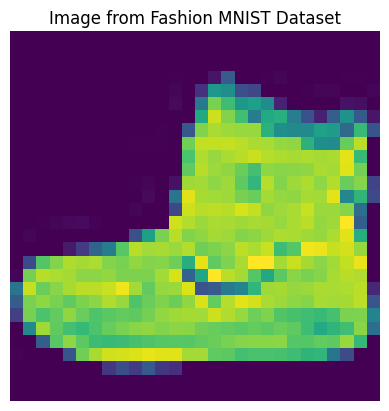

In [ ]:
import matplotlib.pyplot as plt

# Plotting the first image in the training set
plt.imshow(x_train[0])
plt.title('Image from Fashion MNIST Dataset')
plt.axis('off')  # Turn off axis
plt.show()


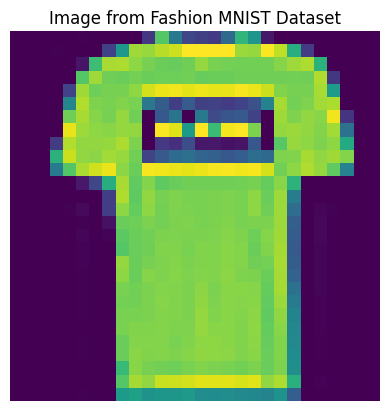

In [ ]:
import matplotlib.pyplot as plt

# Plotting the first image in the training set
plt.imshow(x_train[1])
plt.title('Image from Fashion MNIST Dataset')
plt.axis('off')  # Turn off axis
plt.show()


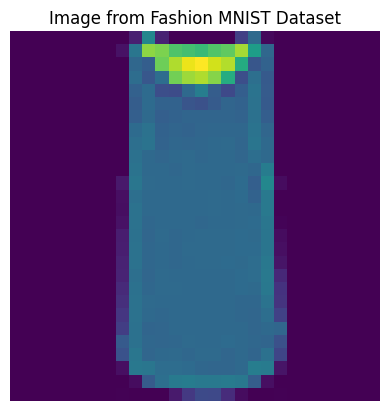

In [ ]:
import matplotlib.pyplot as plt

# Plotting the first image in the training set
plt.imshow(x_train[2])
plt.title('Image from Fashion MNIST Dataset')
plt.axis('off')  # Turn off axis
plt.show()


Preprocessing the Data

Normalize the X train and X test data by dividing by the max value of the image arrays which is 255.

In [ ]:
# Normalize the X train and X test data
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [ ]:
print("Normalized Image:")
print(x_train_normalized[0])

Normalized Image:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
 

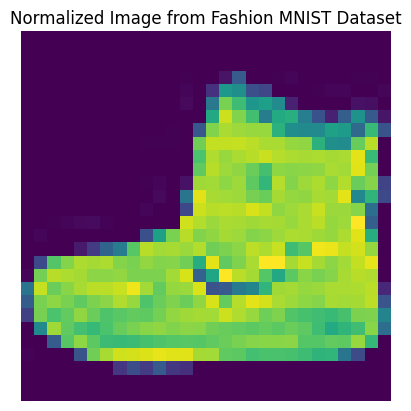

In [ ]:
# Plotting the first image in the normalized training set
plt.imshow(x_train_normalized[0])
plt.title('Normalized Image from Fashion MNIST Dataset')
plt.axis('off')  # Turn off axis
plt.show()


Reshape the X arrays to include a 4 dimension of the single channel.

In [ ]:
# Reshape the X arrays to include a fourth dimension for single channel
x_train_reshaped = x_train_normalized.reshape(x_train_normalized.shape[0], x_train_normalized.shape[1], x_train_normalized.shape[2], 1)
x_test_reshaped = x_test_normalized.reshape(x_test_normalized.shape[0], x_test_normalized.shape[1], x_test_normalized.shape[2], 1)

Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.

In [ ]:
from keras.utils import to_categorical

num_classes = 10  # Number of classes in Fashion MNIST dataset
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

Building the Model
Use Keras to create a model

2D Convolutional Layer, filters=32 and kernel_size=(4,4)

Pooling Layer where pool_size = (2,2)

Flatten Layer

Dense Layer (128 Neurons), RELU activation

Final Dense Layer of 10 Neurons with a softmax activation

Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the model
model = Sequential()

# Add layers
model.add(Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Print the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________


The model summary shows the architecture of the created model along with the output shapes of each layer and the number of parameters. Here's the breakdown:

The first layer, Conv2D, has an output shape of (None, 25, 25, 32), which means it produces feature maps with a size of 25x25 and 32 channels (filters). The number of parameters in this layer is 544.

The second layer, MaxPooling2D, reduces the size of the feature maps by taking the maximum value in each 2x2 window. It doesn't have any trainable parameters.

The Flatten layer reshapes the output of the previous layer into a 1D vector with 4608 elements.

The Dense layer with 128 neurons has 589952 parameters.

The final Dense layer with 10 neurons (one for each class) has 1290 parameters.

The total number of parameters in the model is 591786 (approximately 2.26 MB). All parameters in the model are trainable.

Training the Model¶
Train/Fit the model to the x_train set.

In [ ]:
epochs = 10

# Train the model
history = model.fit(x_train_reshaped, y_train_one_hot, epochs=epochs, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.4421 - accuracy: 0.8418 - val_loss: 0.3286 - val_accuracy: 0.8816
Epoch 2/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2952 - accuracy: 0.8937 - val_loss: 0.2904 - val_accuracy: 0.8968
Epoch 3/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.2519 - accuracy: 0.9082 - val_loss: 0.2800 - val_accuracy: 0.9023
Epoch 4/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2222 - accuracy: 0.9190 - val_loss: 0.2690 - val_accuracy: 0.9044
Epoch 5/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1980 - accuracy: 0.9275 - val_loss: 0.2553 - val_accuracy: 0.9107
Epoch 6/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1774 - accuracy: 0.9351 - val_loss: 0.2821 - val_accuracy: 0.9072
Epoch 7/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1629 - accuracy: 0.9403 - val_loss: 0.2760 -

Interpretation

These metrics show the performance of the model on the training dataset after completing 10 epochs of training. An accuracy of 0.9561 indicates that approximately 95.61% of the predictions made by the model on the training dataset match the true labels.

A loss of 0.1217 means that, on average, the model's predictions are quite close to the true labels on the training dataset after 10 epochs of training

Evaluating the Model¶
The accuracy,precision,recall,f1-score the model achieved on the x_test data set.

In [ ]:
model.layers

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_train_reshaped, y_train_one_hot)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1448 - accuracy: 0.9535


[0.1448444128036499, 0.9535333514213562]

In [ ]:
from sklearn.metrics import classification_report
# Convert predicted labels from one-hot encoded format to categorical
prediction_classes = y_pred

# Generate classification report
report = classification_report(y_true, prediction_classes)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.87      0.85      0.86      1000
           3       0.88      0.92      0.90      1000
           4       0.84      0.86      0.85      1000
           5       0.98      0.97      0.97      1000
           6       0.75      0.71      0.73      1000
           7       0.97      0.92      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.92      0.98      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Another Way to see the report

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict labels for the test data
y_pred_one_hot = model.predict(x_test_reshaped)

# Convert predicted and true labels from one-hot encoded format to categorical
y_pred = y_pred_one_hot.argmax(axis=1)
y_true = y_test

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

313/313 [==============================] - 2s 5ms/step
Accuracy: 0.9008
Precision: 0.9009381258656783
Recall: 0.9008
F1-score: 0.900546428793665


Model Interpretation

Accuracy: An accuracy of 0.9008 means that approximately 90.08% of the predictions made by the model match the true labels in the test dataset

Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. In this case, a precision of approximately 0.9009 means that around 90.09% of the items predicted as positive (belonging to a particular class) by the model are indeed true positives.

Recall: Recall, also known as sensitivity, measures the proportion of true positive predictions among all actual positive instances in the dataset. A recall of approximately 0.9008 indicates that the model correctly identifies around 90.08% of all positive instances in the dataset.

F1-score: The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics. A higher F1-score indicates better overall performance in terms of both precision and recall. With an F1-score of approximately 0.9005, the model achieves a good balance between precision and recall.
